In [ ]:
import torch
torch.cuda.is_available()
device=torch.device("cuda:0")
device
if torch.cuda.is_available():
  device=torch.device("cuda:0")
  print("running on gpu")
else:
  device=torch.device("cpu")
  print("running on cpu")

torch.cuda.device_count()

running on gpu


1

## Use Seaborn to investigate the data and present your findings

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
data = pd.read_csv("/content/Predicting the Price of a Football Player.csv")

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1,England,0,1,20,0,1


In [ ]:
data['fpl_sel'] = data['fpl_sel'].replace('%','',regex=True).astype('float')/10

In [ ]:
output_var = 'market_value'

In [ ]:
import numpy as np
X = data[data.columns[~data.columns.isin([output_var])]]
y = data[[output_var]]

from sklearn.model_selection import train_test_split
np.random.seed(37) # Set seed
x_train, x_test = train_test_split(X, test_size = 0.25)

## dont using iloc as we have projected from data
y_train = y.loc[x_train.index.values] 
y_test = y.loc[x_test.index.values]
x_train = X.loc[x_train.index.values, :]
x_test = X.loc[x_test.index.values, :]

In [ ]:
concat_train_data = pd.concat([x_train,y_train],axis=1)

In [ ]:
concat_train_data.describe()

,age,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,market_value
count,345.000000,345.000000,345.000000,345.00000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,26.802899,2.191304,758.075362,5.44058,0.312841,56.011594,2.011594,0.040580,3.208696,10.243478,0.313043,0.139130,10.753333
std,3.862686,1.007781,939.588994,1.32894,0.553236,52.883592,0.985290,0.197601,1.244726,5.866625,0.464405,0.346585,11.801618
min,17.000000,1.000000,3.000000,4.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000
25%,24.000000,1.000000,217.000000,4.50000,0.020000,2.000000,1.000000,0.000000,2.000000,5.000000,0.000000,0.000000,3.000000
50%,27.000000,2.000000,456.000000,5.00000,0.100000,49.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000,7.000000
75%,29.000000,3.000000,860.000000,5.50000,0.320000,93.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000,15.000000
max,37.000000,4.000000,7664.000000,12.00000,4.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000,75.000000


In [ ]:
concat_train_data.corr()[output_var].sort_values()

position_cat   -0.202518
age            -0.144592
age_cat        -0.116853
club_id        -0.052287
new_foreign     0.097173
region          0.110158
new_signing     0.115376
fpl_sel         0.484164
fpl_points      0.595919
big_club        0.624354
page_views      0.716096
fpl_value       0.771985
market_value    1.000000
Name: market_value, dtype: float64

In [ ]:
concat_train_data.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
page_views        int64
fpl_value       float64
fpl_sel         float64
fpl_points        int64
region            int64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
market_value    float64
dtype: object

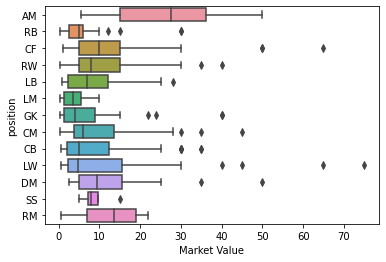

In [ ]:
import seaborn as sns
sns.boxplot(y='position',x=output_var,data=concat_train_data,orient='h')
plt.xlabel("Market Value")
plt.show()

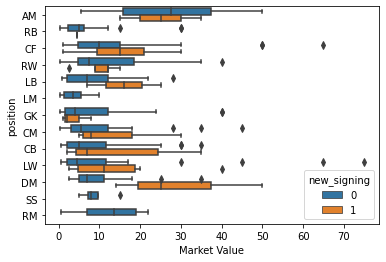

In [ ]:
sns.boxplot(y='position',x='market_value',data=concat_train_data,hue='new_signing',orient='h')
plt.xlabel("Market Value")
plt.show()

In [ ]:
encoded_data = pd.get_dummies(concat_train_data, columns=["new_foreign","big_club","new_signing"],drop_first=True)

In [ ]:
encoded_data.head()

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,age_cat,club_id,market_value,new_foreign_1,big_club_1,new_signing_1
1,Mesut Ozil,Arsenal,28,AM,1,4395,9.5,0.56,167,2,Germany,4,1,50.0,0,1,0
366,Ã€ngel Rangel,Swansea,34,RB,3,137,4.0,1.88,26,2,Spain,6,16,1.0,0,0,0
260,Romelu Lukaku,Manchester+United,24,CF,1,3727,11.5,4.50,221,2,Belgium,2,12,50.0,0,1,0
3,Theo Walcott,Arsenal,28,RW,1,2393,7.5,0.15,122,1,England,4,1,20.0,0,1,0
265,Juan Mata,Manchester+United,29,AM,1,2280,7.0,0.35,102,2,Spain,4,12,30.0,0,1,0


In [ ]:
concat_train_data.corr()[output_var].sort_values()

position_cat   -0.202518
age            -0.144592
age_cat        -0.116853
club_id        -0.052287
new_foreign     0.097173
region          0.110158
new_signing     0.115376
fpl_sel         0.484164
fpl_points      0.595919
big_club        0.624354
page_views      0.716096
fpl_value       0.771985
market_value    1.000000
Name: market_value, dtype: float64

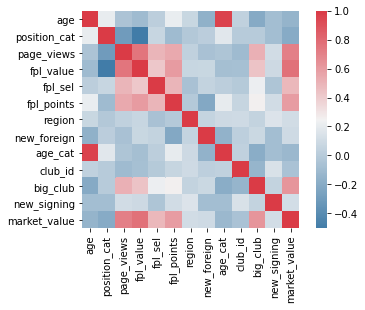

In [ ]:
corr = concat_train_data.corr()
import seaborn as sns
import numpy as np
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True)

In [ ]:
corr

,age,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,market_value
age,1.000000,0.209102,-0.049327,-0.099975,0.024667,0.215552,0.077748,-0.164685,0.969917,0.041378,-0.205341,-0.083684,-0.144592
position_cat,0.209102,1.000000,-0.301136,-0.502653,0.071600,-0.100295,-0.019806,0.019294,0.183599,-0.001018,0.002106,-0.084747,-0.202518
page_views,-0.049327,-0.301136,1.000000,0.755074,0.497496,0.547811,0.038063,-0.058465,-0.033223,-0.101979,0.514907,0.107937,0.716096
fpl_value,-0.099975,-0.502653,0.755074,1.000000,0.420925,0.605196,0.067131,0.075629,-0.077714,-0.071966,0.437659,0.093738,0.771985
fpl_sel,0.024667,0.071600,0.497496,0.420925,1.000000,0.498251,-0.061016,0.049998,0.024549,-0.005185,0.229267,-0.035876,0.484164
fpl_points,0.215552,-0.100295,0.547811,0.605196,0.498251,1.000000,-0.011551,-0.218141,0.206685,0.062469,0.258834,0.111885,0.595919
region,0.077748,-0.019806,0.038063,0.067131,-0.061016,-0.011551,1.000000,0.057300,0.095204,0.096069,0.049222,0.157004,0.110158
new_foreign,-0.164685,0.019294,-0.058465,0.075629,0.049998,-0.218141,0.057300,1.000000,-0.152721,0.026559,0.082913,-0.082678,0.097173
age_cat,0.969917,0.183599,-0.033223,-0.077714,0.024549,0.206685,0.095204,-0.152721,1.000000,0.037607,-0.188779,-0.080978,-0.116853
club_id,0.041378,-0.001018,-0.101979,-0.071966,-0.005185,0.062469,0.096069,0.026559,0.037607,1.000000,-0.137956,0.139128,-0.052287


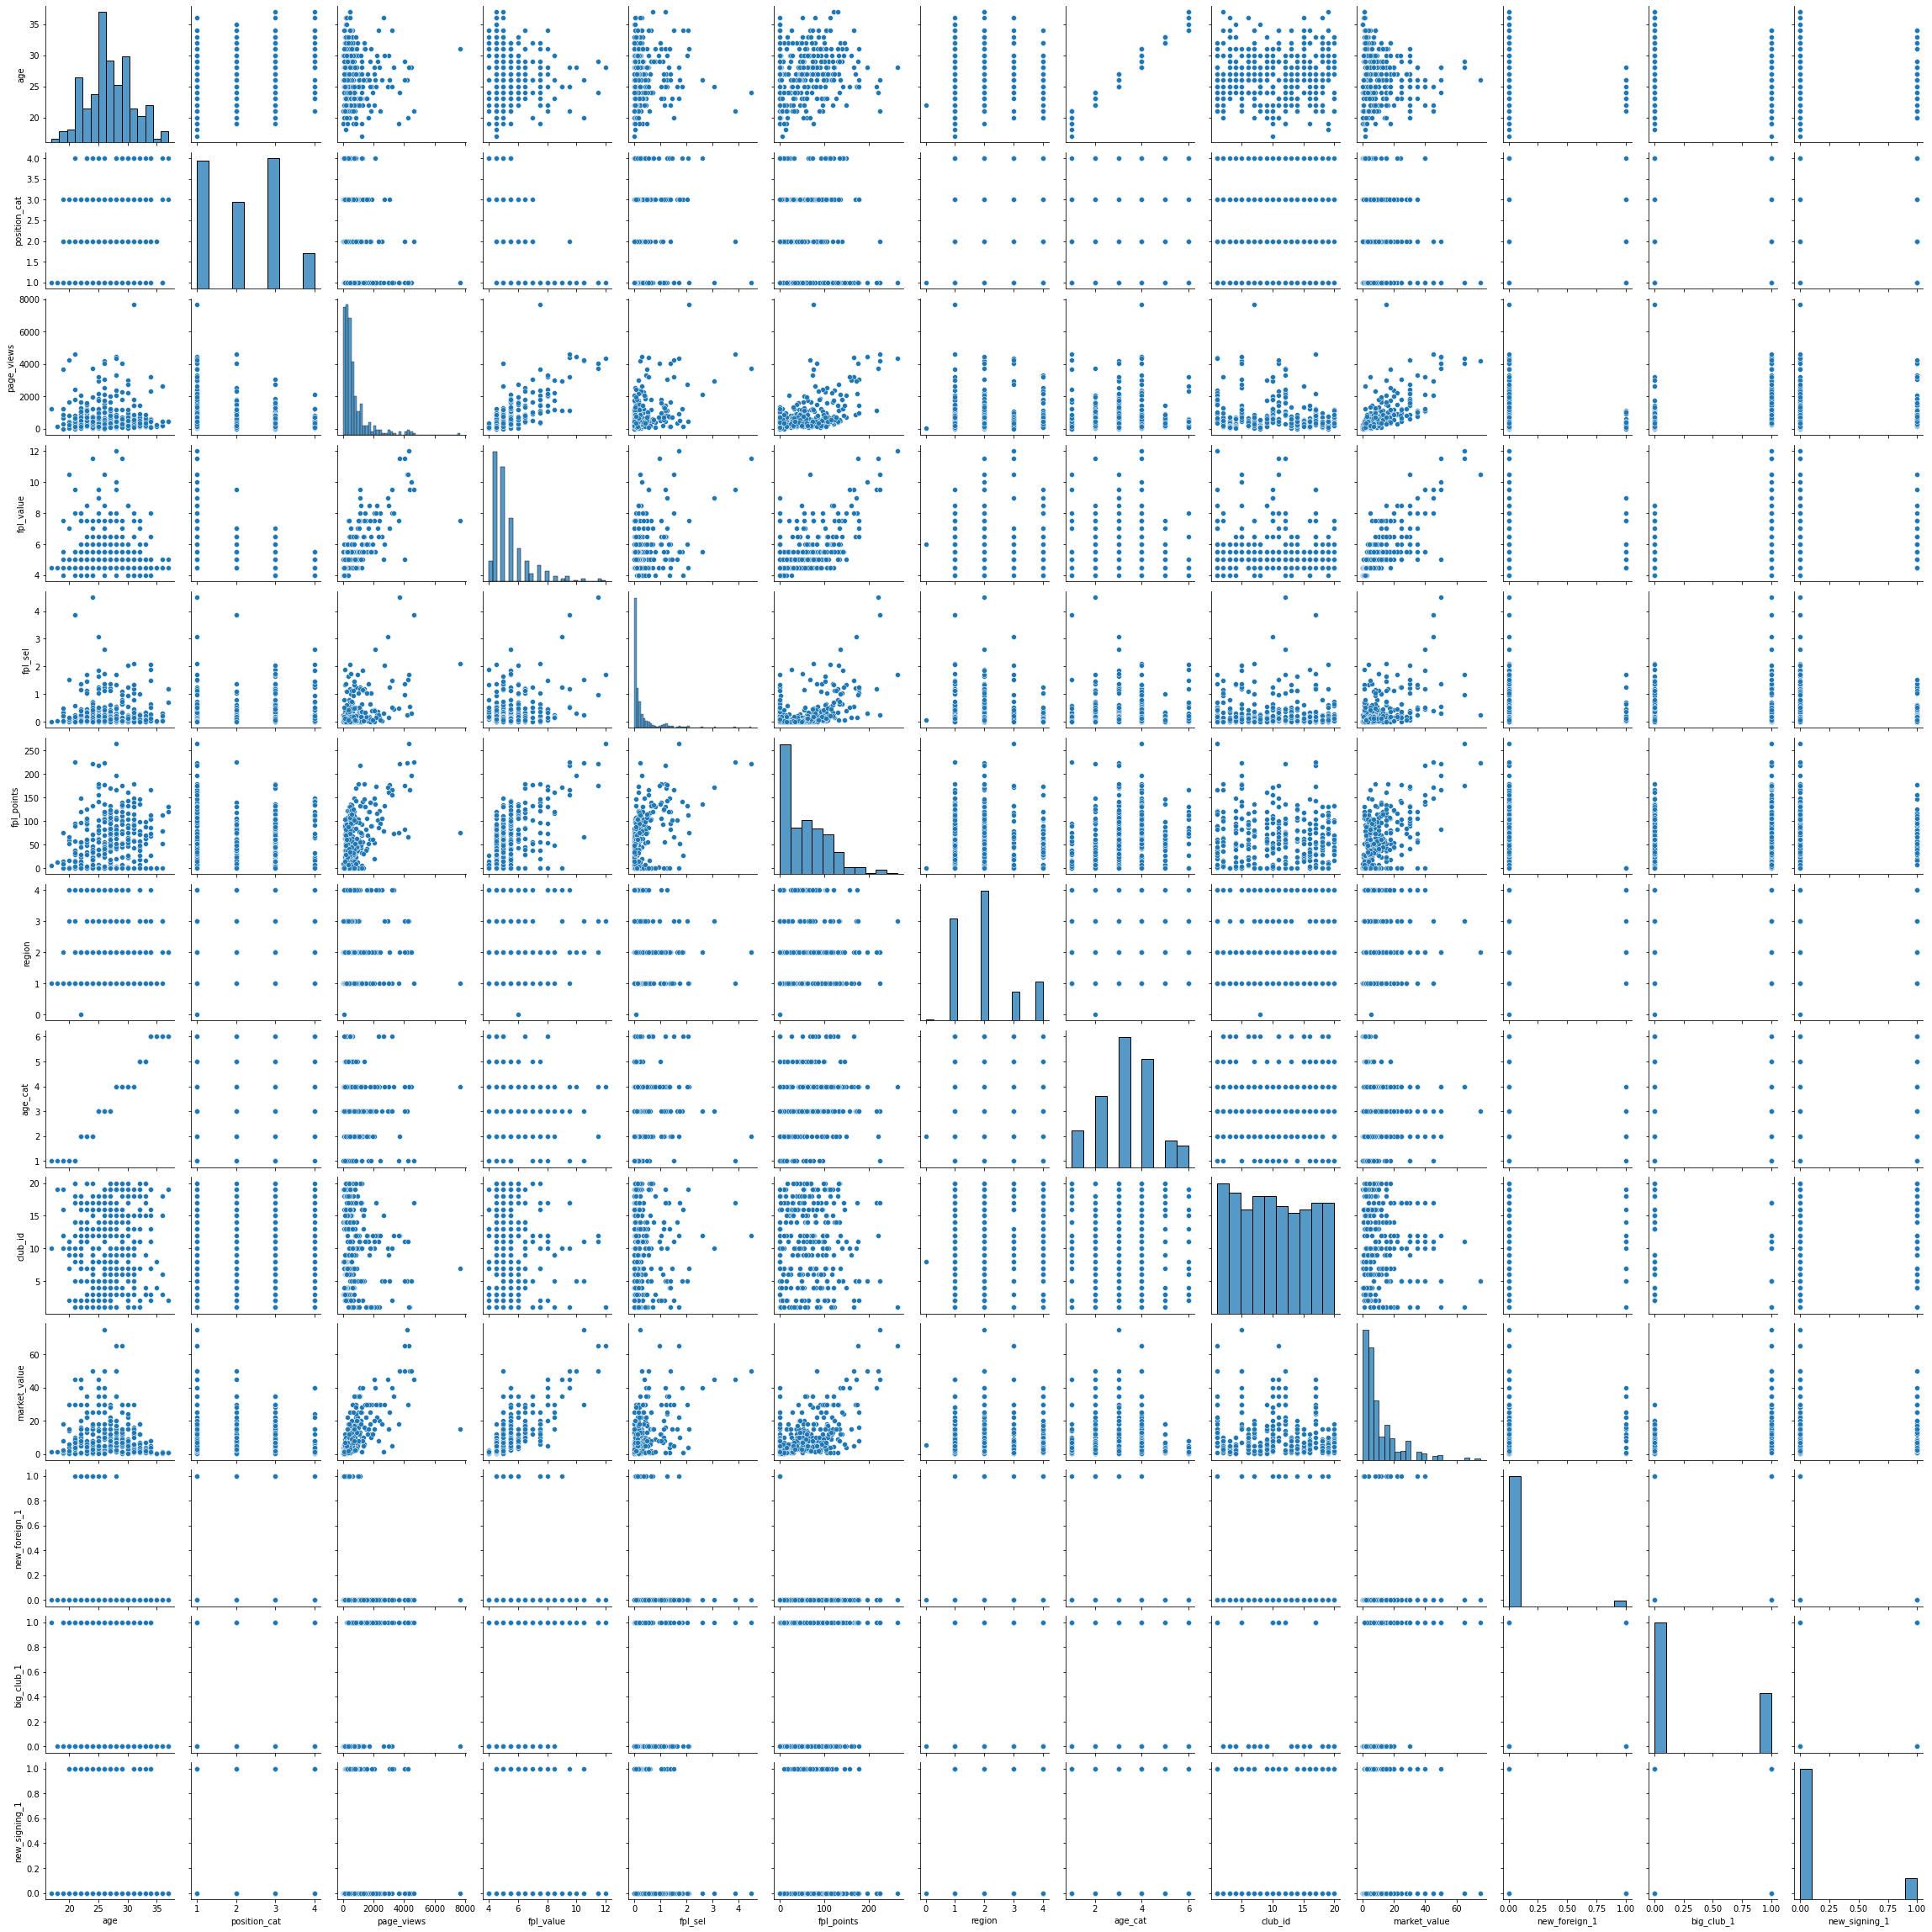

In [ ]:
import seaborn as sns
sns.pairplot(encoded_data,height=2.5);

In [ ]:
encoded_data.head()

,name,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,age_cat,club_id,market_value,new_foreign_1,big_club_1,new_signing_1
1,Mesut Ozil,Arsenal,28,AM,1,4395,9.5,0.56,167,2,Germany,4,1,50.0,0,1,0
366,Ã€ngel Rangel,Swansea,34,RB,3,137,4.0,1.88,26,2,Spain,6,16,1.0,0,0,0
260,Romelu Lukaku,Manchester+United,24,CF,1,3727,11.5,4.50,221,2,Belgium,2,12,50.0,0,1,0
3,Theo Walcott,Arsenal,28,RW,1,2393,7.5,0.15,122,1,England,4,1,20.0,0,1,0
265,Juan Mata,Manchester+United,29,AM,1,2280,7.0,0.35,102,2,Spain,4,12,30.0,0,1,0


## Build models using all the algorithms above to predict market_value

In [ ]:
data=data.drop(columns=['name'])
#make note of this..... cuz im removing from main data not from encoded

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
encoded_data['club']=label_encoder.fit_transform(encoded_data['club'])
encoded_data['position']=label_encoder.fit_transform(encoded_data['position'])
encoded_data['nationality']=label_encoder.fit_transform(encoded_data['nationality'])

In [ ]:
encoded_data=encoded_data.drop(columns=['name'])

In [ ]:
encoded_data.head()

,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,age_cat,club_id,market_value,new_foreign_1,big_club_1,new_signing_1
1,0,28,0,1,4395,9.5,0.56,167,2,23,4,1,50.0,0,1,0
366,15,34,9,3,137,4.0,1.88,26,2,47,6,16,1.0,0,0,0
260,11,24,2,1,3727,11.5,4.50,221,2,5,2,12,50.0,0,1,0
3,0,28,11,1,2393,7.5,0.15,122,1,20,4,1,20.0,0,1,0
265,11,29,0,1,2280,7.0,0.35,102,2,47,4,12,30.0,0,1,0


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_data[encoded_data.columns[~encoded_data.columns.isin([output_var])]])
Y = encoded_data[[output_var]]

In [ ]:
encoded_data.corr()

,club,age,position,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,age_cat,club_id,market_value,new_foreign_1,big_club_1,new_signing_1
club,1.000000,0.041378,0.003524,-0.001018,-0.101979,-0.071966,-0.005185,0.062469,0.096069,0.141633,0.037607,1.000000,-0.052287,0.026559,-0.137956,0.139128
age,0.041378,1.000000,-0.054261,0.209102,-0.049327,-0.099975,0.024667,0.215552,0.077748,0.051207,0.969917,0.041378,-0.144592,-0.164685,-0.205341,-0.083684
position,0.003524,-0.054261,1.000000,-0.148666,-0.028122,0.000701,-0.020999,-0.011167,0.023718,0.062404,-0.030554,0.003524,-0.061075,-0.027684,-0.118118,-0.046163
position_cat,-0.001018,0.209102,-0.148666,1.000000,-0.301136,-0.502653,0.071600,-0.100295,-0.019806,-0.034447,0.183599,-0.001018,-0.202518,0.019294,0.002106,-0.084747
page_views,-0.101979,-0.049327,-0.028122,-0.301136,1.000000,0.755074,0.497496,0.547811,0.038063,-0.081125,-0.033223,-0.101979,0.716096,-0.058465,0.514907,0.107937
fpl_value,-0.071966,-0.099975,0.000701,-0.502653,0.755074,1.000000,0.420925,0.605196,0.067131,-0.098131,-0.077714,-0.071966,0.771985,0.075629,0.437659,0.093738
fpl_sel,-0.005185,0.024667,-0.020999,0.071600,0.497496,0.420925,1.000000,0.498251,-0.061016,-0.057530,0.024549,-0.005185,0.484164,0.049998,0.229267,-0.035876
fpl_points,0.062469,0.215552,-0.011167,-0.100295,0.547811,0.605196,0.498251,1.000000,-0.011551,-0.009951,0.206685,0.062469,0.595919,-0.218141,0.258834,0.111885
region,0.096069,0.077748,0.023718,-0.019806,0.038063,0.067131,-0.061016,-0.011551,1.000000,0.064884,0.095204,0.096069,0.110158,0.057300,0.049222,0.157004
nationality,0.141633,0.051207,0.062404,-0.034447,-0.081125,-0.098131,-0.057530,-0.009951,0.064884,1.000000,0.061459,0.141633,-0.123843,0.070364,-0.139468,0.002776


In [ ]:
x_test['club']=label_encoder.fit_transform(x_test['club'])
x_test['position']=label_encoder.fit_transform(x_test['position'])
x_test['nationality']=label_encoder.fit_transform(x_test['nationality'])
x_test=x_test.drop(columns=['name'])
x_train=encoded_data.drop(columns=['market_value'])

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Regression_Linear = LinearRegression(normalize=True)
print(Regression_Linear.get_params())
print(Regression_Linear.fit(x_train,y_train))
pred_linear = Regression_Linear.predict(x_test)
print("MSE score:",mean_squared_error(y_test,pred_linear))
print("R2 score:",r2_score(y_test,pred_linear))

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
MSE score: 2253.1826765864375
R2 score: -11.382032075377651


In [ ]:
pred_linear

array([[ 73.12537239],
       [ 68.14267011],
       [ 70.41664979],
       [ 71.89918818],
       [ 89.41323628],
       [ 38.99397245],
       [  4.96890692],
       [ 56.45567605],
       [ 12.38012772],
       [ 80.31377304],
       [ 66.81711412],
       [ 38.78692983],
       [ 13.40458301],
       [ 71.25849892],
       [ 46.88400985],
       [ 52.49250857],
       [ 55.21153362],
       [ 63.52825238],
       [ 37.58320781],
       [ 51.43370009],
       [ 40.45156502],
       [ 41.11822136],
       [100.66050843],
       [ 22.74572104],
       [ 39.7530292 ],
       [  2.43032904],
       [ 87.82668467],
       [ 54.31485398],
       [ 32.20614711],
       [ 60.86910207],
       [ 12.271169  ],
       [ 77.63582677],
       [ 28.5377136 ],
       [ 69.11834428],
       [ 58.67717185],
       [ 36.06984864],
       [ 13.96390841],
       [ 47.98727429],
       [ 60.38858314],
       [ 40.43814005],
       [ 18.00494856],
       [ 85.48394133],
       [ 61.30833476],
       [131

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_lasso= model_lasso.predict(x_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_lasso)))
print("R2 score:",r2_score(y_test, pred_lasso))

MSE score: 44.635748023994644
R2 score: -9.948664696519803


In [ ]:
pred_lasso

array([ 69.44203588,  64.61460507,  66.39410946,  68.12412721,
        85.05507233,  37.00225692,   5.05254466,  53.11637642,
        12.40384909,  75.71142705,  64.38593412,  37.07370991,
        12.76664097,  67.26542013,  45.56956223,  50.06284604,
        52.1043572 ,  59.7371816 ,  35.85502347,  48.88083416,
        39.59543366,  39.3792177 ,  95.56679436,  21.77692069,
        37.98903061,   2.54045004,  83.48681665,  51.73612414,
        30.72267749,  57.48927675,  12.19046353,  75.2380979 ,
        27.1307373 ,  66.49798364,  55.57621614,  34.11189035,
        14.54520278,  46.43443744,  57.67840658,  39.10493691,
        17.48405633,  80.76563297,  57.74750722, 127.16746682,
        86.10647007,  48.75350125,  56.01497764,  30.73421952,
        42.28459104,  18.4554149 ,  67.04797233,  65.26654321,
        17.55907594,   8.02165115,  66.49079578,  40.53084107,
        69.65714441,  28.4473953 ,  20.73873059,   4.0695873 ,
        51.14796865,  70.73162505,  18.80043165,  71.11

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
Rigression_Ridge = Ridge(alpha=0.01)
Rigression_Ridge.fit(x_train, y_train) 
pred_Ridge= Rigression_Ridge.predict(x_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_Ridge)))
print("R2 score:",r2_score(y_test, pred_Ridge))

MSE score: 47.42696824958404
R2 score: -11.360790565498204


In [ ]:
pred_Ridge

array([[ 73.07300803],
       [ 68.09096068],
       [ 70.36345854],
       [ 71.84680593],
       [ 89.35239859],
       [ 38.96641984],
       [  4.96427368],
       [ 56.40971814],
       [ 12.37510158],
       [ 80.25046516],
       [ 66.78167792],
       [ 38.75758676],
       [ 13.38709359],
       [ 71.20232382],
       [ 46.8641008 ],
       [ 52.45139874],
       [ 55.16702752],
       [ 63.47247039],
       [ 37.55926949],
       [ 51.39489406],
       [ 40.43464329],
       [ 41.09437768],
       [100.59020205],
       [ 22.72395642],
       [ 39.72338897],
       [  2.42565624],
       [ 87.76398359],
       [ 54.27324803],
       [ 32.18306662],
       [ 60.81772336],
       [ 12.26602784],
       [ 77.60054416],
       [ 28.51473939],
       [ 69.07948229],
       [ 58.62937649],
       [ 36.04239837],
       [ 13.96292392],
       [ 47.96398774],
       [ 60.34671732],
       [ 40.41557605],
       [ 17.9928427 ],
       [ 85.41726045],
       [ 61.25351128],
       [131

## Nearest Neighbour Regression

In [ ]:
from sklearn import neighbors
from math import sqrt
rmse_val = []
for k in range(20):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    model.fit(x_train, y_train) 
    pred_neighbor=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred_neighbor))
    rmse_val.append(error) 
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  1 is: 10.764039549063034
RMSE value for k=  2 is: 9.06017954834648
RMSE value for k=  3 is: 8.674522577872686
RMSE value for k=  4 is: 8.727643082273227
RMSE value for k=  5 is: 8.3945589931607
RMSE value for k=  6 is: 8.399096831577005
RMSE value for k=  7 is: 8.016849778182168
RMSE value for k=  8 is: 7.975249525708023
RMSE value for k=  9 is: 7.953968967709978
RMSE value for k=  10 is: 7.86157585983879
RMSE value for k=  11 is: 7.941886591023533
RMSE value for k=  12 is: 8.095267215670118
RMSE value for k=  13 is: 8.132441697464586
RMSE value for k=  14 is: 8.323159136316256
RMSE value for k=  15 is: 8.3956963923118
RMSE value for k=  16 is: 8.517144730533625
RMSE value for k=  17 is: 8.640876296364445
RMSE value for k=  18 is: 8.68649013612236
RMSE value for k=  19 is: 8.778032310906209
RMSE value for k=  20 is: 8.774911812480529


In [ ]:
pred_neighbor

array([[18.525 ],
       [ 5.75  ],
       [ 2.6875],
       [13.225 ],
       [ 7.725 ],
       [ 4.625 ],
       [ 6.5125],
       [ 2.5875],
       [ 4.3   ],
       [ 3.3375],
       [16.875 ],
       [11.95  ],
       [ 3.2375],
       [ 8.025 ],
       [21.15  ],
       [22.35  ],
       [ 4.4   ],
       [ 6.4875],
       [17.275 ],
       [ 7.25  ],
       [20.525 ],
       [15.825 ],
       [16.175 ],
       [15.825 ],
       [ 9.475 ],
       [ 2.8   ],
       [23.05  ],
       [16.3   ],
       [17.825 ],
       [ 7.1   ],
       [ 4.075 ],
       [22.325 ],
       [ 4.575 ],
       [19.65  ],
       [ 6.025 ],
       [ 2.45  ],
       [19.25  ],
       [16.525 ],
       [18.975 ],
       [15.475 ],
       [ 6.9   ],
       [10.675 ],
       [ 4.7625],
       [37.125 ],
       [10.05  ],
       [19.7   ],
       [10.35  ],
       [ 2.4625],
       [18.3   ],
       [ 6.475 ],
       [19.7   ],
       [20.05  ],
       [ 8.875 ],
       [ 4.925 ],
       [ 8.825 ],
       [16

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR
SupportVectorReg=SVR()
SupportVectorReg.fit(x_train,y_train)
pred_SVR=SupportVectorReg.predict(x_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_SVR)))
print("R2 score:",r2_score(y_test, pred_SVR))

MSE score: 10.47592874913882
R2 score: 0.39691213061159725


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pred_SVR

array([14.53281406,  4.77086358,  2.88536553, 12.20794391,  6.13326102,
        3.71821802,  4.4489073 ,  3.25738372,  4.00498143,  3.46055645,
       17.63266242, 11.14774777,  3.42010457,  6.43108812, 19.68998933,
       19.61529994,  3.86764761,  4.76239334, 17.97400419,  7.47606327,
       16.50296479, 17.90636461, 12.5396061 , 17.75714944,  8.95435769,
        3.28269683, 16.32215791, 13.50037028, 17.19110831,  7.55345741,
        3.874396  , 20.1213742 ,  3.95606975, 14.89571491,  5.0078406 ,
        3.14603626, 19.08544012, 18.5303699 , 18.71074992, 12.71028764,
        4.90661501,  8.40363551,  3.82225918, 24.62874288,  7.90312163,
       19.16520679,  9.21814185,  2.81780348, 19.30034903,  6.67084458,
       19.18118646, 15.69785339,  7.93803664,  4.04493451,  6.41307083,
       18.11963416, 19.85140662,  9.85812803,  2.50382445,  3.60096196,
        4.17346259,  3.58956793, 19.74930116,  8.82213743, 17.26599724,
        4.72457037,  3.09288959,  4.50333029,  5.30864173, 19.02

## Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeReg=DecisionTreeRegressor()
DecisionTreeReg.fit(x_train,y_train)
pred_tree=DecisionTreeReg.predict(x_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_tree)))
print("R2 score:",r2_score(y_test, pred_tree))

MSE score: 9.841880295889636
R2 score: 0.46770586839901285


In [ ]:
pred_tree

array([ 8.  ,  3.5 ,  0.75, 20.  ,  8.  , 18.  ,  4.  ,  0.75,  6.  ,
        3.  , 12.  , 10.  ,  1.  ,  8.  , 20.  , 10.  ,  5.  ,  8.  ,
       20.  ,  8.  , 30.  , 20.  ,  8.  , 20.  , 15.  ,  7.  , 20.  ,
       15.  , 20.  , 13.  ,  5.  , 40.  ,  5.  , 40.  , 10.  ,  0.75,
       35.  , 20.  , 20.  ,  8.  ,  3.  , 13.  ,  1.  , 45.  , 30.  ,
       20.  , 10.  ,  3.  , 20.  ,  8.  , 24.  ,  8.  , 12.  ,  7.  ,
        6.  , 20.  ,  8.  ,  8.  ,  0.5 ,  1.5 ,  2.  ,  2.  , 10.  ,
       25.  , 35.  ,  0.5 , 10.  ,  5.  ,  8.  , 40.  , 18.  ,  7.  ,
        2.5 ,  0.75,  6.  ,  0.75,  8.  ,  3.  , 35.  ,  5.  ,  0.5 ,
        2.  ,  1.5 ,  5.  ,  4.  ,  5.5 ,  0.5 ,  8.  ,  8.  ,  6.  ,
       20.  ,  2.  , 30.  ,  8.  , 18.  ,  6.  ,  8.  ,  5.5 , 40.  ,
        5.  , 12.  , 75.  , 30.  ,  1.5 , 10.  , 13.  , 30.  ,  8.  ,
        2.  ,  7.  ,  2.5 , 75.  ,  0.75, 30.  ,  0.5 , 35.  ])

## Random Forest Regression 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForestReg=RandomForestRegressor()
RandomForestReg.fit(x_train,y_train)
pred_forest=RandomForestReg.predict(x_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_forest)))
print("R2 score:",r2_score(y_test, pred_forest))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


MSE score: 6.158698043109998
R2 score: 0.7915637053996277


In [ ]:
pred_forest

array([11.085 ,  6.635 ,  4.0725, 10.6   , 13.64  ,  5.805 ,  5.39  ,
        3.8725,  6.725 ,  6.405 , 28.97  ,  7.95  ,  3.47  ,  8.59  ,
       20.43  , 11.6   ,  6.275 ,  5.94  , 10.365 ,  7.89  , 28.06  ,
       12.91  , 14.755 ,  8.81  , 10.055 ,  5.2075, 12.985 , 12.81  ,
       13.03  ,  6.0675,  6.515 , 36.27  ,  5.625 , 30.58  ,  7.095 ,
        4.2575, 21.105 , 14.04  , 14.42  , 15.24  ,  8.5675,  9.485 ,
        3.83  , 54.4   , 22.725 , 18.97  , 17.185 ,  4.295 , 14.385 ,
        7.3075, 20.52  , 12.97  , 10.095 ,  5.1075, 10.46  , 16.57  ,
       12.195 ,  8.35  ,  2.1175,  4.5925,  4.6   ,  4.7   , 21.35  ,
       14.2   , 28.26  ,  6.7425,  4.965 ,  5.6   ,  7.68  , 30.98  ,
       17.16  ,  6.77  ,  3.06  ,  4.32  ,  7.6925,  1.6465,  8.155 ,
        5.8425, 27.09  , 10.115 ,  1.9365,  7.13  ,  5.6425,  9.29  ,
        2.3425,  5.584 ,  4.1725,  7.8525,  9.26  ,  9.895 , 21.3   ,
        4.0475, 25.91  ,  9.68  , 11.9   ,  5.455 ,  7.355 ,  6.44  ,
       32.09  ,  8.0

## Gradient Boosted Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(
    n_estimators= 500,
    max_depth= 4,
    min_samples_split= 5,
    learning_rate= 0.01,
)
regressor.fit(x_train,y_train)
pred_gradient = regressor.predict(x_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_gradient)))
print("R2 score:",r2_score(y_test,pred_gradient))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE score: 6.180443705944269
R2 score: 0.790089177057778


In [ ]:
pred_gradient

array([10.3818251 ,  6.99254079,  3.45510829, 11.16539339, 15.74263033,
        9.08928724,  4.84370186,  3.20559398,  6.10623523,  5.4674084 ,
       27.37021636,  5.60066466,  2.72172661,  8.58877528, 16.71083431,
        9.88300648,  4.91517262,  5.30727826, 10.2120249 ,  7.99615795,
       26.74875144, 13.25192867, 14.00432588,  4.58545422,  6.4618961 ,
        3.89155912, 13.05250368,  7.958597  , 13.13934646,  5.83435203,
        6.70935409, 41.03980812,  5.21396444, 33.63287206,  5.46850459,
        3.61797898, 17.50035557, 13.68477617, 11.83337985, 15.35333777,
        6.37531114,  9.09006337,  3.10422382, 51.56919255, 21.68988084,
       14.83977273, 21.36820902,  3.46402425, 11.7954571 ,  5.62462546,
       16.60808211, 12.48553192,  7.78365191,  5.00863522, 10.33587096,
       15.25883101, 12.14740603,  8.14731491,  1.16067274,  2.7833553 ,
        4.31062053,  4.03537426, 20.06241374, 12.8134112 , 27.005685  ,
        6.99315618,  3.32329555,  6.49298787,  7.81755168, 33.24

## Tune the hyperparameters and build the most accurate model

In [ ]:
from sklearn.model_selection import GridSearchCV,RepeatedKFold,RandomizedSearchCV

## For Linear Regression

In [ ]:
model = LinearRegression()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['copy_X'] = [True, False]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=1, cv=cv)
result = search.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('LinearRegression GridSearch Accuracy: %s' % result.best_estimator_.score(x_test,y_test))

Best Score: -4.319281419264125
Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
LinearRegression GridSearch Accuracy: -11.382032075377651


## Accurate model:

In [ ]:
linearRegressor = LinearRegression(normalize=True,fit_intercept=False,copy_X=True)
linearRegressor.fit(x_train, y_train)
yPrediction = linearRegressor.predict(x_test)
print("RMSE score:",np.sqrt(mean_squared_error(y_test,yPrediction)))
print("R2 score:",r2_score(y_test,yPrediction)) 

RMSE score: 54.74359131021873
R2 score: -15.468805129349892


## For Lasso Regression

In [ ]:
model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['max_iter'] = [1,10,50,100]
space['copy_X'] = [True, False]
space['warm_start'] = [True, False]
space['selection'] = ['cyclic', 'random']
space['precompute'] = [True, False,]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Lasso GridSearch Accuracy: %s' % result.best_estimator_.score(x_test,y_test))

Best Score: -4.240566475479193
Best Hyperparameters: {'alpha': 0.01, 'copy_X': False, 'fit_intercept': True, 'max_iter': 10, 'normalize': True, 'precompute': True, 'selection': 'random', 'warm_start': True}
Lasso GridSearch Accuracy: -10.808741351789669


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1172.3352495614417, tolerance: 4.791169366666667
  tol, rng, random, positive)


## Accurate Model:

In [ ]:
model_lasso = Lasso(alpha=0.01,selection='random')
model_lasso.fit(x_train, y_train) 
pred_lasso= model_lasso.predict(x_test)
print("RMSE score:",np.sqrt(mean_squared_error(y_test,pred_lasso)))
print("R2 score:",r2_score(y_test, pred_lasso))

RMSE score: 44.991174613855385
R2 score: -10.123723485983499


## For Ridge Regression

## Type Markdown and LaTeX:  𝛼^2

In [ ]:
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] =  ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['max_iter'] = [1,10,50,100,500,1000]
space['copy_X'] = [True, False]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Ridge GridSearch Accuracy: %s' % result.best_estimator_.score(x_test,y_test))

Best Score: -4.227049326675834
Best Hyperparameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 10, 'normalize': True, 'solver': 'sag'}
Ridge GridSearch Accuracy: -16.53391516942623


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Accurate Model:

In [ ]:
rr = Ridge(alpha=1,solver = 'lsqr')
rr.fit(x_train, y_train) 
pred_rr= rr.predict(x_test)
print("RMSE score:",np.sqrt(mean_squared_error(y_test,pred_rr)))
print("R2 score:",r2_score(y_test, pred_rr))

RMSE score: 7.3203682790345175
R2 score: 0.7055162179805238


## For Nearest Neighbour Regression

In [ ]:
model=neighbors.KNeighborsRegressor()

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

search = GridSearchCV(model, hyperparameters, cv=10)
result = search.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Knn GridSearch Score: %s' % result.best_estimator_.score(x_test,y_test))

Best Score: 0.5200726289993008
Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 24, 'p': 1}
Knn GridSearch Score: 0.5680141582840241


## Accurate Model:

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 16,algorithm='kd_tree',p=1,weights='distance')
model.fit(x_train, y_train)  #fit the model
pred_knn=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred_knn)) #calculate rmse

print('RMSE value :', error)
print("R2 score:",r2_score(y_test, pred_knn))

RMSE value : 8.622021473671152
R2 score: 0.5914796253878369


## For Support Vector Regression

In [ ]:
model = SVR()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['max_iter'] = [1,10,50,100]
space['kernel']= ['linear','poly','rbf','sigmoid']
space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]
space['C']: [0.1, 1, 10, 100, 1000]

search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

result = search.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('SVR GridSearch Accuracy: %s' % result.best_estimator_.score(x_test,y_test))

Best Score: -6.099489733412793
Best Hyperparameters: {'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 100}
SVR GridSearch Accuracy: 0.2185178234939857


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


## Accurate Model:

In [ ]:
'''
SVR()
SupportVectorReg=SVR(kernel='poly',gamma=1)
SupportVectorReg.fit(x_train,y_train)
pred_svr=SupportVectorReg.predict(x_test)

print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_svr)))
print("R2 score:",r2_score(y_test, pred_svr))
'''
SupportVectorReg=SVR()
SupportVectorReg.fit(x_train,y_train)
pred_SVR=SupportVectorReg.predict(x_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_SVR)))
print("R2 score:",r2_score(y_test, pred_SVR))

MSE score: 10.47592874913882
R2 score: 0.39691213061159725


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## For Tree Regression

In [ ]:
model = DecisionTreeRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['max_depth']= [None,1,2,3,4,5,6,7]
space['max_features']= [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7 ]
space['min_samples_split']= [2,0.3,0.5]
space['min_samples_leaf']=[1, 0.3,0.5]
space['criterion'] = ['mse','friedman_mse','mae']
space['splitter'] = ['best','random']
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4.537185920582436
Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


## Accurate Model:

In [ ]:
DecisionTreeReg=DecisionTreeRegressor(criterion= 'friedman_mse', max_depth= 6, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
DecisionTreeReg.fit(x_train,y_train)
pred_tree=DecisionTreeReg.predict(x_test)
print("RMSE score:",np.sqrt(mean_squared_error(y_test,pred_tree)))
print("R2 score:",r2_score(y_test, pred_tree))

RMSE score: 7.11986429441369
R2 score: 0.7214270436370289


## For Random Forest Regression

In [ ]:
model = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
              
RF_RandomCv = RandomizedSearchCV(estimator=model,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
result=RF_RandomCv.fit(x_train,y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Random Forest GridSearch Accuracy: %s' % result.best_estimator_.score(x_test,y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Score: 0.7774042844927579
Best Hyperparameters: {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 1000}
Random Forest GridSearch Accuracy: 0.7597747041311681


## Accurate Model:

In [ ]:
RandomForestReg=RandomForestRegressor(max_depth=8, max_features='sqrt',n_estimators=200)
RandomForestReg.fit(x_train,y_train)
pred_forest=RandomForestReg.predict(x_test)
print("RMSE score:",np.sqrt(mean_squared_error(y_test,pred_forest)))
print("R2 score:",r2_score(y_test, pred_forest))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RMSE score: 6.679054568133203
R2 score: 0.75485360871305


## For Gradient Boosted Regression

In [ ]:
model =GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['n_estimators']= [200, 500]
space['max_features']= ['auto', 'sqrt', 'log2']
space['max_depth'] = [4,5,6,7,8]
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100,0.99]
space['loss'] = ['ls', 'lad', 'huber', 'quantile']
space['subsample'] = [1]
search = RandomizedSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Score: -3.45074930135845
Best Hyperparameters: {'subsample': 1, 'n_estimators': 500, 'max_features': 'log2', 'max_depth': 4, 'loss': 'lad', 'alpha': 0.1}


## Accurate Model:

In [ ]:
regressor = GradientBoostingRegressor(
    subsample =  1,
    n_estimators= 500, 
    max_features= 'log2', 
    max_depth= 5, 
    loss= 'lad', 
    alpha= 0.01
)
regressor.fit(x_train,y_train)
pred_gboost = regressor.predict(x_test)
print("RMSE score:",np.sqrt(mean_squared_error(y_test,pred_gboost)))
print("R2 score:",r2_score(y_test,pred_gboost))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE score: 6.906251422901736
R2 score: 0.7378919913863964


## Use model selection approaches discussed in class to choose the best model

From all the above models we can observe that the SUPPORT VECTOR REGRESSION, reports us the best results as the R2 value of the SVR is lowest among all other regressions. The Best Score of SVR is  -6.099489733412793, Best Hyperparameters: {'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 100}, Accuracy: 0.2185178234939857, MSE score: 10.47592874913882 and R2 score: 0.39691213061159725
So, Support vector Machine is the best algorithm among all others in this scenario. So we deployed Support Vector Machine Regression in Restful API.


## Genetic Algorithm

In [ ]:
import csv
import random as rand
import math
import operator


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)


def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    # print('Distances: ')
    # print(*distances, sep=",")
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(min(k, len(distances))):
        neighbors.append(distances[x][0])
    return neighbors


def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        #print('Neighbors: ' + neighbors[x][-1])
        #print(classVotes)
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    # print(classVotes)#coba1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]


def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct = correct+1
    return (correct / float(len(testSet))) * 100.0


def generateChromosome(chromosome):
    return [rand.randint(1, 100) for x in range(chromosome)]


def desimal(biner):
    return int(biner, 2)


def kNN(k, testSet, trainingSet):
    # generate predictions
    predictions = []
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    #print('Accuracy: ' + repr(accuracy) + '%')
    return accuracy


def crossover(one, two):
    parent = [one, two]
    zero = '0'
    male = "{0:b}".format(parent[0])
    female = "{0:b}".format(parent[1])
    length = max(len(male), len(female))
    if length % 2 == 1:
        length = length + 1
    while len(male) < length:
        male = zero + male

    while len(female) < length:
        female = zero + female

    child = []
    half = int(length / 2)
    male1 = male[:half]
    male2 = male[half:]

    female1 = female[:half]
    female2 = female[half:]

    child.append(desimal(male1 + female2))
    child.append(desimal(female1 + male2))
    return child



# prepare data
trainingSet = x_train
testSet = x_test
split = 0.67

print('Train set: ' + repr(len(trainingSet)))
print('Test set: ' + repr(len(testSet)))

accResult = [[]]
chromosome = 10
population = generateChromosome(chromosome)

for x in range(len(population)):
  accResult.append([population[x], kNN(population[x], testSet, trainingSet)])

del accResult[0]

for x in range(200):
        status_one = True
        status_zero = True
        accResult = sorted(accResult, key=lambda l: l[1], reverse=True)
        newChromosome = crossover(accResult[0][0], accResult[1][0])
        for i in accResult:
            if newChromosome[0] == i[0]:
                status_zero = False;
            if newChromosome[1] == i[0]:
                status_one = False
        if status_zero:
            accResult.append([newChromosome[0], kNN(newChromosome[0], testSet, trainingSet)])
        if status_one:
            accResult.append([newChromosome[1], kNN(newChromosome[1], testSet, trainingSet)])

accResult = sorted(accResult, key=lambda l: l[1],reverse=True)
print("accuracy: \n")
print(accResult[0][1])   

Train set: 345
Test set: 116
accuracy: 

86.20689655172413


In [ ]:
!pip install flask-ngrok

## RESTFUL API

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask

In [ ]:
from flask import Flask, render_template, request, Response
app =Flask(__name__)

df = pd.read_csv('/content/Predicting the Price of a Football Player.csv')

df1=df
df1.drop(["name","club","position","nationality","fpl_sel"],axis='columns',inplace=True)

x=df1[df1.columns[~df1.columns.isin(["market_value"])]].to_numpy()
y=df1.market_value.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

run_with_ngrok(app)

@app.route("/" , methods=['GET','POST'])
def index():
    return render_template("ml_assignment.html")
@app.route("/data", methods=['GET','POST'])
def data():     
    if request.method == "POST":
         opt= request.form['excellent']
         m = int(opt)*1
         a= request.form['age']
         b= request.form['position_cat']
         c= request.form['page_views']
         d= request.form['fpl_value']
         e= request.form['fpl_points']
         f= request.form['region']
         g= request.form['new_foreign']
         h= request.form['age_cat']
         i= request.form['club_id']
         j= request.form['big_club']
         k= request.form['new_signing']
         li=[a,b,c,d,e,f,g,h,i,j,k]
         model=SVR()
         model.fit(x_train,y_train)
         y_pred_svr=model.predict(x_test)
         market_value=model.predict([li])
    return render_template("ml_data.html",market_value=market_value )

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://e18f32e10f59.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [ ]:
!ngrok authtoken 1k2FFfPooTPMAKtuJFQ0iCleB2o_39Y3J6rSwnpkESb46Z7h3

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
